# Train / Test

We'll start by creating some data set that we want to build a model for (in this case a polynomial regression):

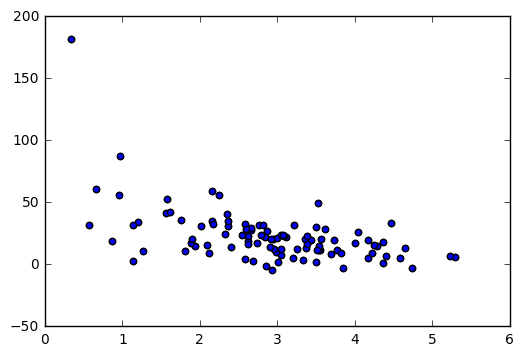

In [2]:
import numpy as np
from pylab import *
import matplotlib.pyplot as plt

# generate some random data
np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100) / pageSpeeds

# plot the date
plt.scatter(pageSpeeds, purchaseAmount)
plt.show()
plt.close()

Now we'll split the data in two - 80% of it will be used for "training" our model, and the other 20% for testing it. This way we can avoid overfitting. Now this is actually a very naive approach. In real live, we would use random sampling to split the data.

```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

```

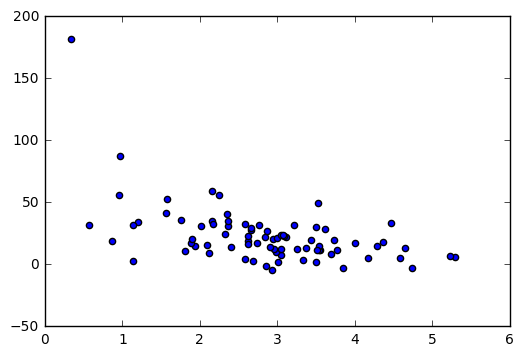

In [7]:
# naivly split data into 80% training and 20% test data 

# Training and Test inputs
X_train = pageSpeeds[:80]
X_test = pageSpeeds[80:]

# Training and Test outputs
y_train = purchaseAmount[:80]
y_test = purchaseAmount[80:]

# Plot the training data
plt.scatter(X_train, y_train)
plt.show()
plt.close()

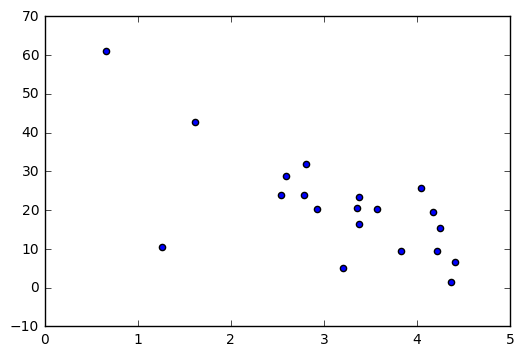

In [8]:
# Plot the training data
plt.scatter(X_test, y_test)
plt.show()
plt.close()

Now we'll try to fit an 8th-degree polynomial to this data (which is almost certainly overfitting, given what we know about how it was generated!)

In [19]:
x = np.array(X_train)
y = np.array(y_train)

testx = np.array(X_test)
testy = np.array(y_test)

# fit an polinomial regression to the training data of degree eight
p4 = np.poly1d(np.polyfit(x, y, 8))

print(p4)

       8         7         6         5        4        3        2
0.734 x - 17.01 x + 165.7 x - 881.9 x + 2788 x - 5315 x + 5898 x - 3442 x + 838.4


Let's plot our polynomial against the training data:

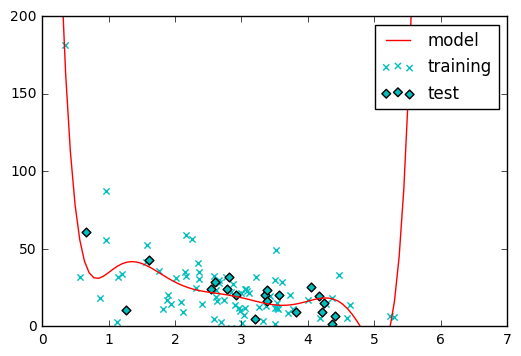

In [36]:
# plot the model on our training data
xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(x, y, c='c', marker='x', label='training')
plt.scatter(testx, testy, c='c', marker='D', label='test')
plt.plot(xp, p4(xp), c='r', label='model')
plt.legend()
plt.show()
plt.close()

Doesn't look that bad when you just eyeball it, but the r-squared score on the test data is kind of horrible! This tells us that our model isn't all that great... And if we look at the ends of the model, this gets pretty obvious. While there is no test data here, the fitted line runs up very steaply, creating strong predictions.

In [39]:
from sklearn.metrics import r2_score

# calculate R² for our test data
r2 = r2_score(y_test, p4(X_test))
print(r2)

0.300181686118


If we look at our training data, the fit is much better (which we could expect since we used that data for training purposes. Now in fact, however, we see that our model predicts random noice rather than real variation. We'd better go back and reduce the degree of our function to get this model more reliable.

In [42]:
from sklearn.metrics import r2_score

# calculate R² for our training data
r2 = r2_score(y_train, p4(X_train))
print(r2)

0.642706951469


## Activity

Try measuring the error on the test data using different degree polynomial fits. What degree works best?